# Support Vector Regression (SVR)

## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [15]:
dataset = pd.read_csv('final_data.csv')
X = dataset.iloc[::-1].values
y = dataset.iloc[:, -1].values

In [16]:
print(X)

[[  -5.19562   53.         3.51      33.75      -1.     ]
 [  -7.20439   88.       -68.4       32.75      -2.     ]
 [ -15.99464  764.       109.75      34.5       -5.     ]
 ...
 [ -24.9763   799.      -368.57      34.75       1.4    ]
 [ -25.4218   871.       372.64      35.25      -5.6    ]
 [ -18.8673   803.        51.85      48.        -1.9    ]]


In [17]:
print(y)

[ -1.9  -5.6   1.4  -2.4  -1.1 -10.2   0.4  -0.1  -2.   -5.8   1.2   0.
  -0.1   0.    0.  -11.  -31.   -5.   -1.   -5.    0.    0.  -20.    0.
   0.  -27.   -9.   -3.    0.  -17.    5.   -2.  -20.    1.    0.  -23.
   0.   -5.    0.   -1.  -27.   -5.    0.   -6.   60.   -4.   -8.   -5.
  -5.   -1.    0.  -18.   -6.    0.  -20.    1.   -9.   -7.   -3.   -1.
   0.    0.   -1.   -7.   -1.   -7.    0.   -3.    0.   -4.   -1.   -1.
   0.   35.   -3.   -1.  -26.   -2.    0.   -1.   -1.  -14.   -1.    0.
   0.    0.    0.    0.    0.    0.    0.   -2.   -2.   -1.    0.   -2.
  -1.   -1.   -3.    0.   -4.    0.   -1.   -5.   -1.   -2.    0.    0.
  -2.    0.    0.    0.   -1.   -2.   -1.   -2.   -1.  -16.    3.    1.
   0.   -1.    0.    0.   -2.    0.   -1.    0.    0.   -2.   -2.    0.
  -2.   -1.   -1.   -2.   -2.   -2.   -1.   -2.   -5.    0.   -2.   -3.
  -1.    0.    0.   -2.   -1.   56.    0.    0.   -7.   -6.    0.   -4.
 -23.   -3.    0.   -1.  -11.  -34.   -1.    0.   -1.    0.    0

In [18]:
y = y.reshape(len(y),1)

In [19]:
print(y)

[[ -1.9]
 [ -5.6]
 [  1.4]
 [ -2.4]
 [ -1.1]
 [-10.2]
 [  0.4]
 [ -0.1]
 [ -2. ]
 [ -5.8]
 [  1.2]
 [  0. ]
 [ -0.1]
 [  0. ]
 [  0. ]
 [-11. ]
 [-31. ]
 [ -5. ]
 [ -1. ]
 [ -5. ]
 [  0. ]
 [  0. ]
 [-20. ]
 [  0. ]
 [  0. ]
 [-27. ]
 [ -9. ]
 [ -3. ]
 [  0. ]
 [-17. ]
 [  5. ]
 [ -2. ]
 [-20. ]
 [  1. ]
 [  0. ]
 [-23. ]
 [  0. ]
 [ -5. ]
 [  0. ]
 [ -1. ]
 [-27. ]
 [ -5. ]
 [  0. ]
 [ -6. ]
 [ 60. ]
 [ -4. ]
 [ -8. ]
 [ -5. ]
 [ -5. ]
 [ -1. ]
 [  0. ]
 [-18. ]
 [ -6. ]
 [  0. ]
 [-20. ]
 [  1. ]
 [ -9. ]
 [ -7. ]
 [ -3. ]
 [ -1. ]
 [  0. ]
 [  0. ]
 [ -1. ]
 [ -7. ]
 [ -1. ]
 [ -7. ]
 [  0. ]
 [ -3. ]
 [  0. ]
 [ -4. ]
 [ -1. ]
 [ -1. ]
 [  0. ]
 [ 35. ]
 [ -3. ]
 [ -1. ]
 [-26. ]
 [ -2. ]
 [  0. ]
 [ -1. ]
 [ -1. ]
 [-14. ]
 [ -1. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ -2. ]
 [ -2. ]
 [ -1. ]
 [  0. ]
 [ -2. ]
 [ -1. ]
 [ -1. ]
 [ -3. ]
 [  0. ]
 [ -4. ]
 [  0. ]
 [ -1. ]
 [ -5. ]
 [ -1. ]
 [ -2. ]
 [  0. ]
 [  0. ]
 [ -2. ]
 [  0. ]
 [  0. ]
 

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train)

[[-1.97802e+00  5.20000e+02  8.96000e+00  2.80000e+01 -1.00000e+00]
 [-1.13713e+01  1.43800e+03  0.00000e+00  3.65000e+01 -2.00000e+00]
 [-3.72881e-01  6.10000e+01 -2.40000e-01  3.30000e+01  0.00000e+00]
 ...
 [-3.04463e+01  1.08500e+03  0.00000e+00  2.40000e+01 -1.10000e+01]
 [-4.08599e+01  2.84000e+03 -2.47530e+02  4.80000e+01 -4.00000e+00]
 [-4.13648e+01  2.91800e+03 -2.65500e+01  2.55000e+01 -7.00000e+00]]


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_X.fit_transform(X)
sc_y.fit_transform(y)
X_train = sc_X.transform(X_train)
y_train = sc_y.transform(y_train)

In [23]:
print(X_train)

[[ 0.60524 -0.40435  0.0415  -1.07668  0.19062]
 [ 0.16684  0.34148 -0.00359  0.11026  0.02472]
 [ 0.68015 -0.77727 -0.0048  -0.37848  0.35652]
 ...
 [-0.72342  0.05468 -0.00359 -1.63524 -1.46835]
 [-1.20944  1.48054 -1.24928  1.71612 -0.30707]
 [-1.23301  1.54392 -0.1372  -1.42578 -0.80476]]


In [24]:
print(y_train)

[[ 0.02472]
 [ 0.19062]
 [ 0.19062]
 [ 0.35652]
 [ 0.35652]
 [ 0.19062]
 [ 0.19062]
 [ 0.19062]
 [ 0.19062]
 [ 0.35652]
 [ 0.35652]
 [ 0.19062]
 [-0.57251]
 [-1.46835]
 [-0.47297]
 [ 0.35652]
 [ 0.35652]
 [ 0.02472]
 [ 0.19062]
 [ 0.35652]
 [-0.47297]
 [ 0.02472]
 [ 0.19062]
 [ 0.19062]
 [ 0.35652]
 [ 0.19062]
 [ 0.35652]
 [-0.30707]
 [ 0.35652]
 [ 0.35652]
 [ 0.19062]
 [ 0.35652]
 [ 0.19062]
 [ 0.35652]
 [-0.80476]
 [ 0.02472]
 [ 0.19062]
 [ 0.35652]
 [ 0.19062]
 [ 0.02472]
 [-2.96142]
 [-0.30707]
 [ 0.35652]
 [ 0.02472]
 [ 0.02472]
 [ 0.19062]
 [-0.63886]
 [ 0.35652]
 [-0.80476]
 [ 0.35652]
 [ 0.19062]
 [-0.47297]
 [ 0.35652]
 [ 0.19062]
 [ 0.35652]
 [-3.45912]
 [ 0.19062]
 [ 0.35652]
 [-0.14117]
 [ 0.85421]
 [ 0.35652]
 [ 0.19062]
 [-0.30707]
 [ 0.35652]
 [-0.30707]
 [ 0.35652]
 [-0.14117]
 [ 0.19062]
 [-0.80476]
 [ 0.35652]
 [-0.47297]
 [ 0.19062]
 [ 0.5556 ]
 [ 0.02472]
 [ 0.35652]
 [ 0.02472]
 [ 0.35652]
 [-0.30707]
 [-0.30707]
 [ 0.35652]
 [ 0.19062]
 [ 0.35652]
 [-0.30707]
 [ 0

## Training the SVR model on the whole dataset

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

Mean Difference: 2.3659224605064675
Median Difference: 1.2473233154467
Standard Deviation of Difference: 4.0189165707415215


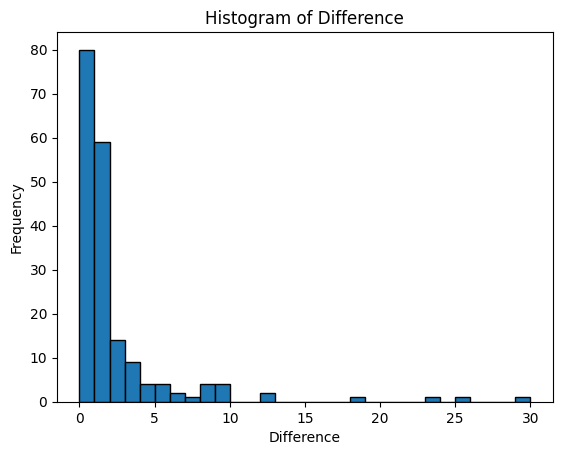

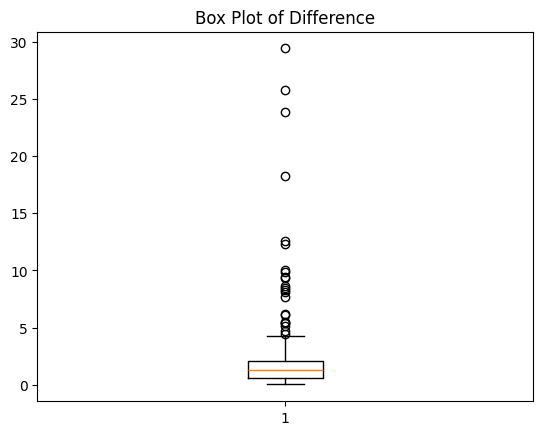

-1.4587445596588609 0.0
-0.7172204194558849 -1.0
-1.9245508995650944 0.0
-0.5679670987723571 0.0
-1.0224628878415563 -1.0
-0.933768219266673 0.0
-1.4501337200013746 -1.0
-3.199809540701308 0.0
-0.9591449524339593 1.0
-2.434079808189183 -2.0
-1.6211411790082069 0.0
-2.433177918797471 -1.0
-1.107678282662689 0.0
-1.481787325237724 -2.0
-0.5643030601868957 0.0
-1.8827912038438626 -7.0
-1.4288610833968582 -1.0
-1.2444975212618417 0.0
-1.4823332818686277 -1.0
-0.6970206536963104 -2.0
-0.619946299504909 -1.0
-1.5971864605920087 -7.0
-1.4256576814558353 0.0
-1.0017529419815154 -3.0
-0.8164358619676806 0.0
-1.2304863519915084 -1.0
-0.6939384151530155 -1.0
-0.785734145309809 -3.0
-0.8615951677285918 -3.0
-1.6081668846611303 -11.0
-1.5144045593814268 -1.0
-1.341075648997356 -9.0
-1.1130882516598364 -2.0
-1.1769309881256196 0.0
-1.3111130063651508 -2.0
-1.5332034432445987 0.0
-2.222954101160302 -2.0
-2.0069207820501784 -12.0
-0.8813200925850819 0.0
-1.2903844208287851 0.0
-1.344728170607136 0.0
-

In [27]:
from math import floor, ceil
y_pred = sc_y.inverse_transform([regressor.predict(sc_X.transform(X_test))])[0]
np.set_printoptions(precision=5)
y_test_1d = y_test.reshape(1, len(y_test))[0]
# Basic statistical information

absolute_difference = np.abs(y_test_1d - y_pred)

mean_difference = np.mean(absolute_difference)
median_difference = np.median(absolute_difference)
std_dev_difference = np.std(absolute_difference)

# Print the results
# print("Absolute Difference:", absolute_difference)
print("Mean Difference:", mean_difference)
print("Median Difference:", median_difference)
print("Standard Deviation of Difference:", std_dev_difference)

plt.hist(absolute_difference, bins=range(floor(min(absolute_difference)), ceil(max(absolute_difference)+1)), edgecolor='black')
plt.title('Histogram of Difference')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(x=absolute_difference)
plt.title('Box Plot of Difference')
plt.show()

for y_p, y_t in zip(y_pred, y_test.reshape(1, len(y_test))[0]):
    print(y_p, y_t)